# Anomaly Detection
See also Outlier Detection.

Learning to recognize unusual events
is difficult if due to the lack of training examples.

Yet, missing the anomalies is often costly.

Compared to noise filtering, noise is to be removed but anomalies are to be highlighted.

## Signature vs Anomaly methods
* Signature methods are trained with data labeled normal.
* Anomaly methods are trained with data labeled abnormal.

## Taxonomy
* Anomaly Detection : A Survey. Chandola, Banerjee, Kumar. ACM Computing Surveys, September 2009. First appeared as [Technical Report](http://cucis.ece.northwestern.edu/projects/DMS/publications/AnomalyDetection.pdf).

Techniques: classification, clustering, nearest neighbor, statistical, information theory, spectral.

Applications: cyber intrusion, fraud, industrial, medical, images, text, sensors.

Types of anomaly:
* Point. Datum is anomalous by itself.
* Context. Datum would be ok sometimes but not when it occurred.
* Collective. Each event is ok but not all at once.

Types of detection / learning:
* Supervised. Given labels of normal & abnormal.
* Semi-supervised. Given labeled examples of normal.
* Unsupervised. Guess that majority class is normal.

## Classification-based anomaly detection
Supervised. Point-based.

May be one class (all else is anomaly) or multiclass (anomalies are those that can't be classified). Neural networks require a training phase. Replicator networks reconstruct the data from a reduced representation (e.g. U-net); the lossy reconstruction tends to omit outliers (e.g. SVD). Bayesian networks incorporate priors to produce posteriors; apply Laplace smoothing to the anomalies that have zero prior. SVMs can learn the boundary of one-class normal e.g. hypersphere in kernel space (any RBF is such a kernel).  

Can exploit sophisticated techniques e.g. neural networks. Though training is costly, predition is fast. But labeled data is costly and sometimes a score is more helpful than a label.

## Rule-based anomaly detection
Supervised. Point-based.

Create rules that explain normal. Cases that violate all rules are abnormal. One subset is [association rule learning](https://en.wikipedia.org/wiki/Association_rule_learning) e.g. customer that buys potatoes and onions usually buys hamburger.

## Nearest-neighbor based anomaly detection
Unsupervised. Point-based. No training but costly at prediction time. The basic algorithm is O(n^2) and heuristics don't scale to high dimensional data. For categorical data, distance is measured within a category graph. For efficiency, sample or prune the normal instances, or examine micro-clusters of data.

Use a distance measure. It does not have to be a true metric, but it has to work for the datatype given. For protein sequences, use a probabilistic suffix tree (PST). 

Variants of k nearest neighbors e.g. whether k=1 is an anomaly, or whether sum scores of k neighbors tends toward anomaly.  

Another approach is density i.e. count n neighbors within distance d, or compute distance d needed to reach n neighbors. 

Local density uses radius that contains k nearest neighbors. This fails if density varies naturally and especially if anomalies are clustered. Two corrections are LOF, COF. LOF uses ratio of this point's density (its k nearest neighbors) to the average density of its k nearest neigbors. COF is similar but grows the neighborhood incrementally; this can grow odd shapes with spikes, not just hyperspheres. There are many other variants: MDEF, LOCI, ODIN.



## Clustering-based anomaly detection
Unsupervised. Point-based. Good: many algorithms exist for many data types. Bad: the algorithms are designed to find clusters, not anomalies. Similar to nearest-neighbor if your cluster defines your neighbors. Predictions are fast. Learning is slow e.g. O(dN^2) in some cases; many algorithms operate on partitions (one uses CD-trees) to reduce search space.

Approach 1: Assume anomalies will not cluster. Points outside of any cluster are anomalies. Use an algorithm like DBSCAN rather than, say hierarchical clustering which forces all points into clusters. 

Approach 2: Assume anomalies will cluster, but not well. Use a threshold of point's distance from cluster centroid. Can use SOM, K-Means, or EM. Can be semi-supervised. K-means is O(n). 

Approach 3: Assume anomalies will form a cluster, detectable by size or density. 

## Statistical anomaly detection
Unsupervised (no labels needed) but requires a model. Point-based.

### Parametric. 
Fit a distribution and find statistical outliers. For stats, can use Gaussian and MLE but there are alternatives such as Grubb's test. Can use extreme value statistics. Extensions fit multiple distributions (including possibly one for the anomalies, having high variance). Many have linear time. 

Alternately, compare given distribution to a known distribution. For stats, can use t-test, Hotelling test, chi-square test, and more. 

For time series data, use a regression model, and use residuals as anomaly score. AIC gives an information-theoretic score. "Robust fitting" tries to exclude outliers (anomalies) during fitting; can be applied to ARMA or ARIMA = auto regressive integrated moving average.

* AR - Autoregressive predicts future based on past values.
* MA - Moving average predicts future based on mean & error estimates.
* I - Use differencing to remove seasonal effects and achieve stationarity.

### Non-parameteric.
Build histograms of features of normal data. For prediction, combine bar heights as estimate of probability of this being normal. This is widely used for network intrusion detection (signature methods). Of course, this can miss interaction effects. 

Parzen windows estimation. Use kernel functions to estimate distributions of normal data. These can have quadratic time.

## Information-theoretic anomaly detection
Unsupervised. No statistical assumptions. Point-based.

Anomalies decrease entropy and the ability to compress the file. Can measure entropy, information content, or Kolmogorov Complexity (shortest regular expression or shortest program that could have produced it). Exact algorithms are exponential, but approximation algorithms are linear. 

Problem: you tend to overestimate complexity if you simply don't know the true generating function (e.g. a fractal image). 

## Spectral anomaly detection
Unsupervised. Point-based. Costly. Ideal for high-dimensional data, since a lower-dimensional embedding comes free.

Find a lower dimensional space (embedding, projection, subspace) that separates normal from abnormal. 

Can use PCA, O(Nd^2). Can use chi-square to detect anomaly in num principal components needed. Alternately, can use SVD, O(N^2).

Similarly, Complex Matrix Decomposition reconstructs the matrix from fewer features, and removes outliers. 

## Context-based
Data has contextual and behavioral attributes (also called environmental and indicator). Context might be geographical, historical, neighbors, class or profile. The problem is usually discovering the right context for each data point.

One approach discovers the context, then applies the appropriate point-based anomaly detection.

Another approach models (a) the context and (b) the behavior and (c) the context-conditional behavior model. There are many approaches using many above techniques (SVM, ARIMA, etc). 

## Collective anomalies
These are ok on their own, but not together. The grouping can be based on time, space, or graph neighborhood. A sequence can be modeled with a FSA, a HMM, or trees (PST, SMT). Example: normal vs abnormal word frequencies. Sequence analysis can do this with suffix trees and interpolated Markov models (IMM). Self-similarity measures at fine and coarse scales.

## Wrap-up

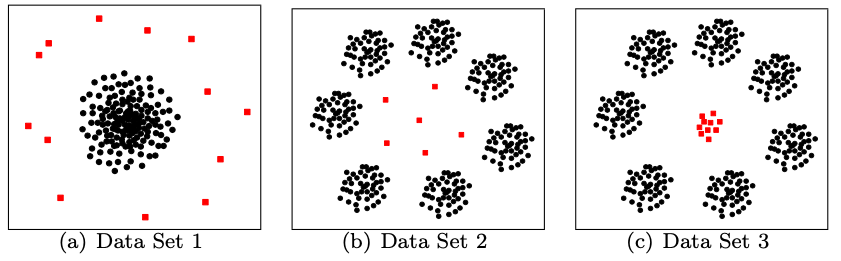

Case a. Could use Gaussian statistics; one-cluster method plus distance from centroid; local density measures.

Case b. Could use Guassian mixture; local density; multi-cluster method plus distance from centroid; nearest neighbors might detect one or two clusters.

Case c. Size of anomaly cluster is anomalous, as is distance from normal centroids.

Spectral methods are good for high-dimentional data.

Nearest neighbor methods require a distance concept.

Classification requires training. 

Assumption that anomaly=infrequent can be violated e.g. DDOS attack.